# Image brightness detection

### Problem statement :
Develop a generalized algorithm to detect the brightness of any image.
Your algorithm should take an image as input and give a score between (0-10) as output (zero being low bright and 10 being high bright).

In [1]:
#importing required dependencies
from PIL import Image
from PIL import ImageStat
import math

### Data about Image File
    -File Diamention
    -No of pixels
    -Pixel range
    -Distribution of pixels

In [2]:
# print Meta Data of Image

# Function to
def getMetaData(filePath):
    # create object
    img = Image.open(filePath)
    Stats = ImageStat.Stat(img)

    # print size of image
    size = img.size
    print("Size of Image is :", size)

    # print pixels in image
    print("Number of (R G B) pixels is :", Stats.count)
    print("Min/max values for each band in the image :\n",Stats.extrema)
    print("Total number of pixels for each band in the image :\n",Stats.count)
    print("Sum of all pixels for each band in the image :\n",Stats.sum)
    print("Squared sum of all pixels for each band in the image :\n",Stats.sum2)
    print("Average (arithmetic mean) pixel level for each band in the image :\n",Stats.mean)
    print("Median pixel level for each band in the image :\n",Stats.median)
    print("RMS (root-mean-square) for each band in the image :\n",Stats.rms)
    print("Variance for each band in the image :\n",Stats.var)
    print("Standard deviation for each band in the image :\n",Stats.stddev)

#### Get Data For Absulute dark image
    color : Black : #000000

In [3]:
# get Data For Absulute dark image
# color : Black : 000000 

# filePath to open a file
filePath = "../input/black.png"

getMetaData(filePath)

Size of Image is : (800, 401)
Number of (R G B) pixels is : [320800, 320800, 320800]
Min/max values for each band in the image :
 [(0, 0), (0, 0), (0, 0)]
Total number of pixels for each band in the image :
 [320800, 320800, 320800]
Sum of all pixels for each band in the image :
 [0.0, 0.0, 0.0]
Squared sum of all pixels for each band in the image :
 [0.0, 0.0, 0.0]
Average (arithmetic mean) pixel level for each band in the image :
 [0.0, 0.0, 0.0]
Median pixel level for each band in the image :
 [0, 0, 0]
RMS (root-mean-square) for each band in the image :
 [0.0, 0.0, 0.0]
Variance for each band in the image :
 [0.0, 0.0, 0.0]
Standard deviation for each band in the image :
 [0.0, 0.0, 0.0]


#### Get Data for Absulute White-Bright image
    color: #ffffff : white

In [4]:
# get Data for Absulute White-Bright image
# color: #ffffff : white

# filePath to open a file
filePath = "../input/white.png"

getMetaData(filePath)

Size of Image is : (800, 399)
Number of (R G B) pixels is : [319200, 319200, 319200]
Min/max values for each band in the image :
 [(255, 255), (255, 255), (255, 255)]
Total number of pixels for each band in the image :
 [319200, 319200, 319200]
Sum of all pixels for each band in the image :
 [81396000.0, 81396000.0, 81396000.0]
Squared sum of all pixels for each band in the image :
 [20755980000.0, 20755980000.0, 20755980000.0]
Average (arithmetic mean) pixel level for each band in the image :
 [255.0, 255.0, 255.0]
Median pixel level for each band in the image :
 [255, 255, 255]
RMS (root-mean-square) for each band in the image :
 [255.0, 255.0, 255.0]
Variance for each band in the image :
 [0.0, 0.0, 0.0]
Standard deviation for each band in the image :
 [0.0, 0.0, 0.0]


# Functions to Calculate Brightness

#### Key Globals and Variables :
    -Black : (R, G, B) : (0, 0, 0)
    -White : (R, G, B) : (255, 255, 255)
    -Brightness Range : (0, 255) and (0, 10)
    -Mean, Median, RMS for both Gray scale and Color Image

### 1) For Gray Scale Image
    -Converting color image into Gray Scale and then find Brightness

In [5]:
# Mean
def getMeanBrightness_GS(filePath):
    img = Image.open(filePath).convert('L')
    Stats = ImageStat.Stat(img)
    MeanB255 = Stats.mean[0]    
    MeanB10 = ( MeanB255/255 )* 10
    return MeanB255, MeanB10


# Median
def getMedianBrightness_GS(filePath):
    img = Image.open(filePath).convert('L')
    Stats = ImageStat.Stat(img)
    MeanB255 = Stats.median[0]
    MeanB10 = ( MeanB255/255 )* 10
    return MeanB255, MeanB10


# RMS
def getRMSBrightness_GS(filePath):
    img = Image.open(filePath).convert('L')
    Stats = ImageStat.Stat(img)
    MeanB255 = Stats.rms[0]
    
    MeanB10 = ( MeanB255/255 )* 10
    return MeanB255, MeanB10

In [6]:
# for blcak image
filePath = "../input/black.png"

print(getMeanBrightness_GS(filePath))
print(getMedianBrightness_GS(filePath))
print(getRMSBrightness_GS(filePath))



# for white image
filePath = "../input/white.png"

print(getMeanBrightness_GS(filePath))
print(getMedianBrightness_GS(filePath))
print(getRMSBrightness_GS(filePath))

(0.0, 0.0)
(0, 0.0)
(0.0, 0.0)
(255.0, 10.0)
(255, 10.0)
(255.0, 10.0)


### 2) For Color image
    -Calculation of Brightness using R G B each and every pixels

In [7]:
# Mean of rgb pixels
def getMeanBrightenss(filePath):
    img = Image.open(filePath)
    Stats = ImageStat.Stat(img)
    r,g,b = Stats.mean
    MeanB255 = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))
    
    MeanB10 = ( MeanB255/255 )* 10
    return MeanB255, MeanB10


# Median
def getMedianBrightness(filePath):
    img = Image.open(filePath)
    Stats = ImageStat.Stat(img)
    r,g,b = Stats.median
    MeanB255 = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

    MeanB10 = ( MeanB255/255 )* 10
    return MeanB255, MeanB10


# RMS
def getRMSBrightness(filePath):
    img = Image.open(filePath)
    Stats = ImageStat.Stat(img)
    r,g,b = Stats.rms
    MeanB255 = math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

    MeanB10 = ( MeanB255/255 )* 10
    return MeanB255, MeanB10

In [8]:
# for black image
filePath = "../input/black.png"

print(getMeanBrightenss(filePath))
print(getMedianBrightness(filePath))
print(getRMSBrightness(filePath))


# for White image
filePath = "../input/white.png"

print(getMeanBrightenss(filePath))
print(getMedianBrightness(filePath))
print(getRMSBrightness(filePath))


(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(255.0, 10.0)
(255.0, 10.0)
(255.0, 10.0)


# Evaluation of Algorithm

#### Evaluating our ALgorithm on
    -Generate Images for precise testing
    -Predict on Generated Colored Images to validate the algorithm
    -Predict on Practice imageSet

#### Generate images using RGB Values
    -Starting from 0 absulute dark upto the 255 Brightest white color
    -with some diff value
    -save image with name : "r_g_b.png"

In [38]:
#Function to Create Testing image set 
def genImageNet():
    img = Image.new("RGB", (200,200))
    r,g,b = 0,0,0
    diff = 60
    for r in range(0,256,diff):
        for g in range(0,256,diff):
            for b in range(0,256,diff):
                data = [(r,g,b) for y in range(img.size[1]) for x in range(img.size[0])]
                img.putdata(data)
                #img.show()
                img.save("../ImageNet/{}_{}_{}.png".format(r,g,b)) 
                #print(r,g,b)

In [ ]:
# Uncomment the below code to generate images

#genImageNet()

In [46]:
import matplotlib.pyplot as plt


def plotData(filePath):
    img = Image.open(filePath)

    fig = plt.figure()
    a = fig.add_subplot()
    imgplot = plt.imshow(img)

    meanB = "Mean B " + str(getMeanBrightenss(filePath))
    medianB = "medianB " + str(getMedianBrightness(filePath))
    rmsB = "rmsB " + str(getRMSBrightness(filePath))
    
    finalB = ( getMeanBrightenss(filePath)[1] + getMedianBrightness(filePath)[1] + getRMSBrightness(filePath)[1] )/3
    
    a.text(300,50, meanB, fontsize=15)
    a.text(300,100, medianB, fontsize=15)
    a.text(300,150, rmsB, fontsize=15)
    a.text(300,200, finalB, fontsize=15)

    plt.show()

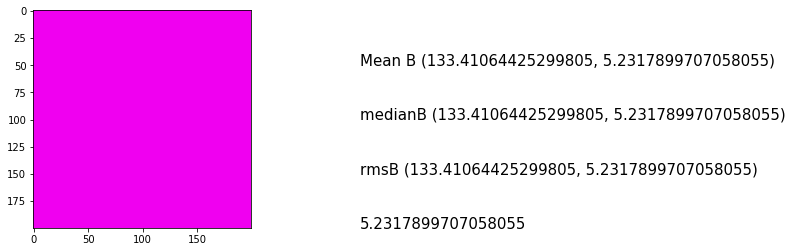

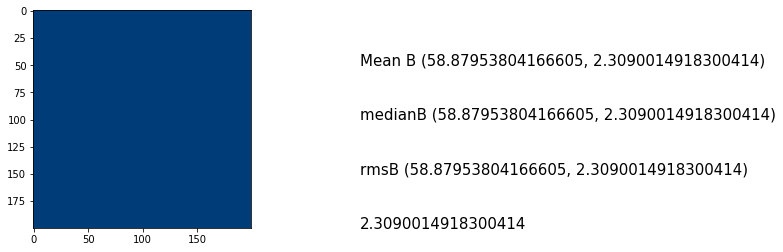

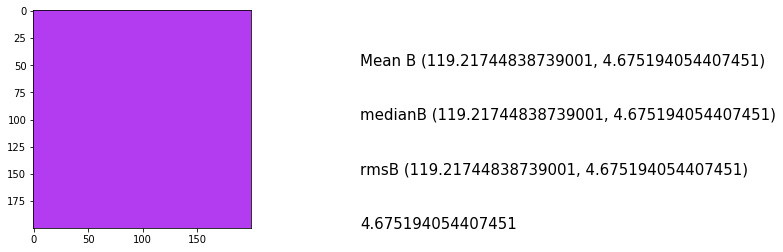

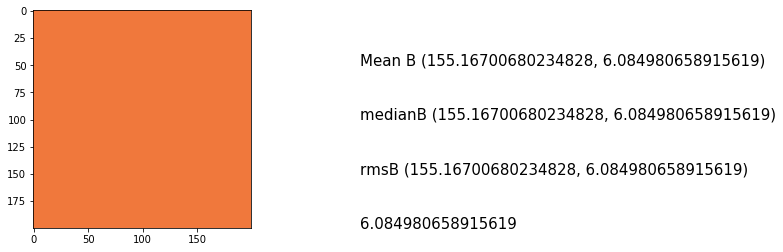

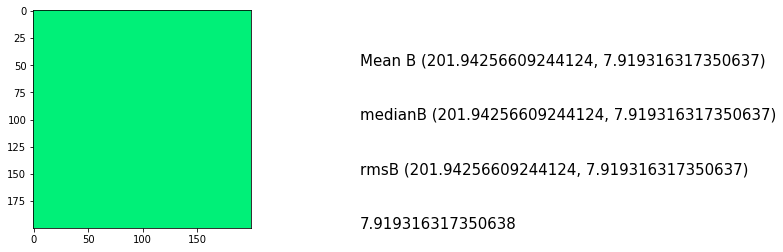

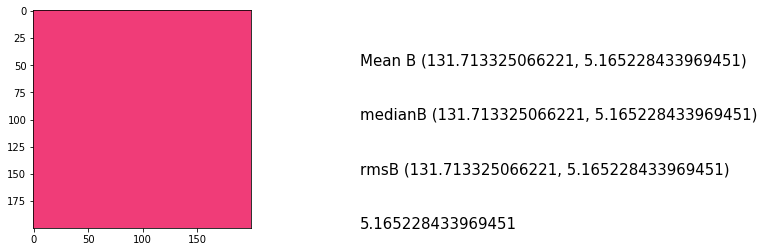

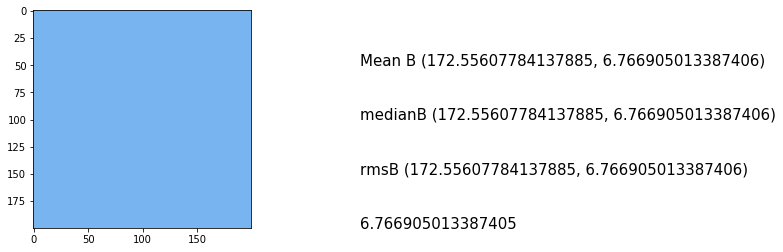

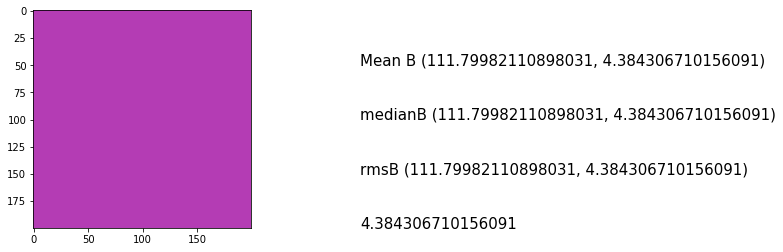

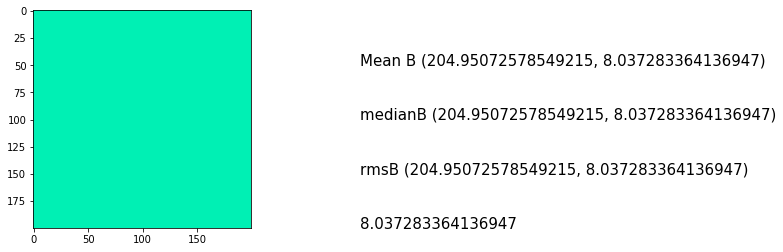

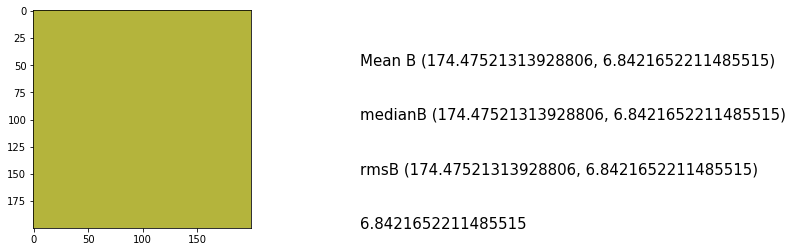

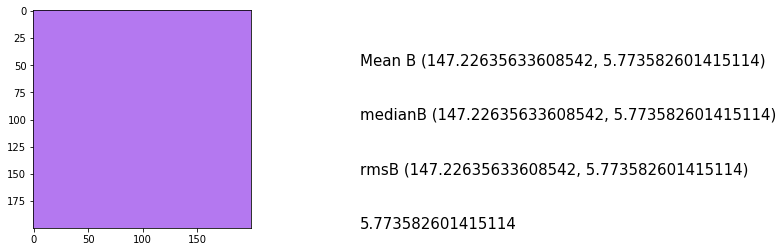

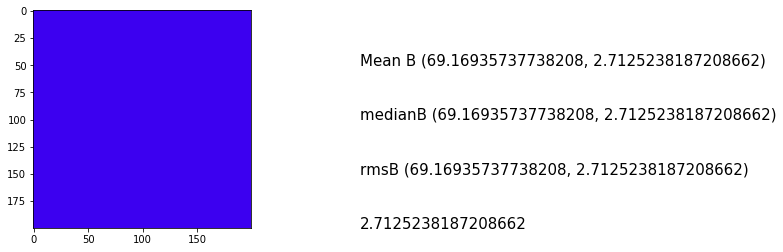

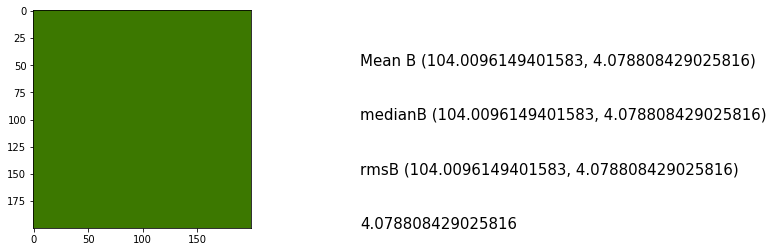

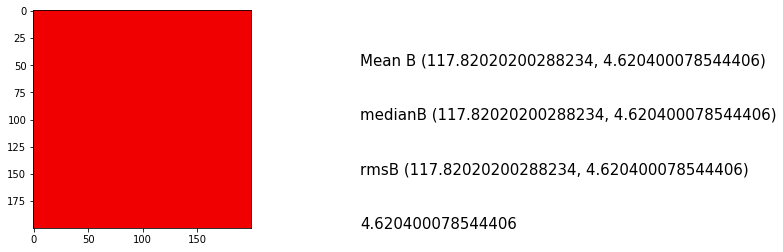

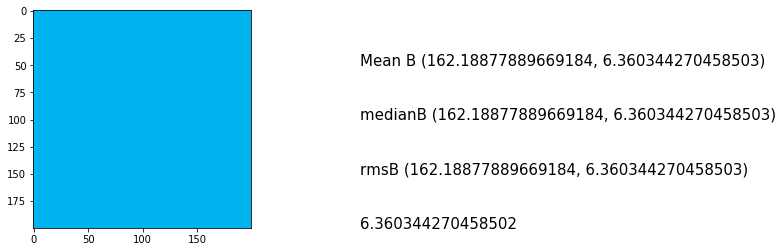

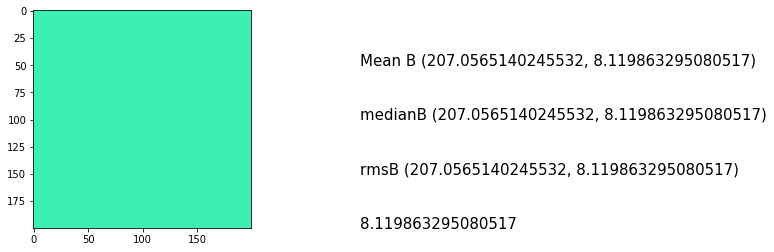

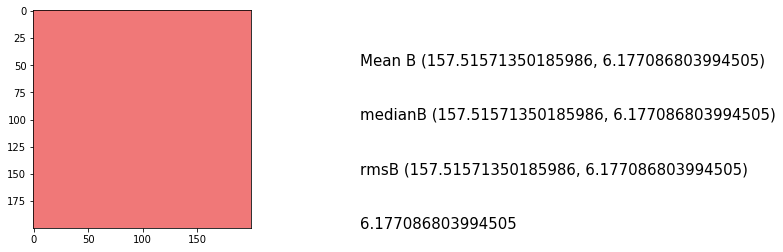

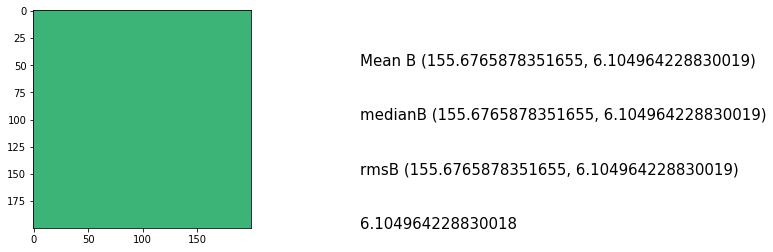

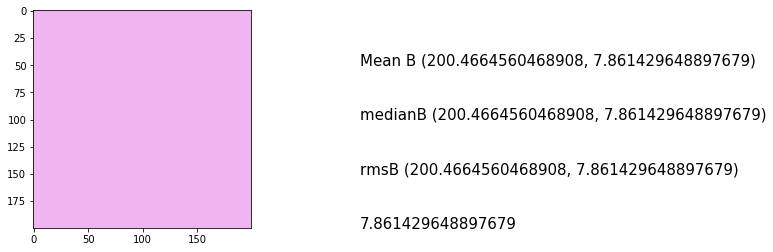

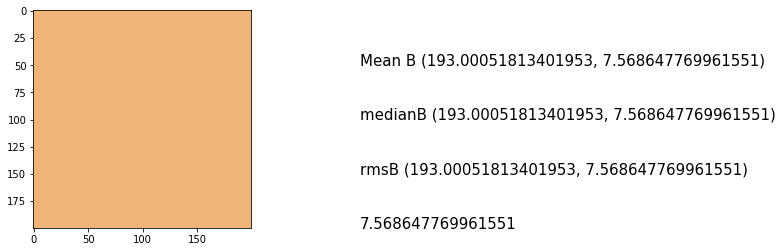

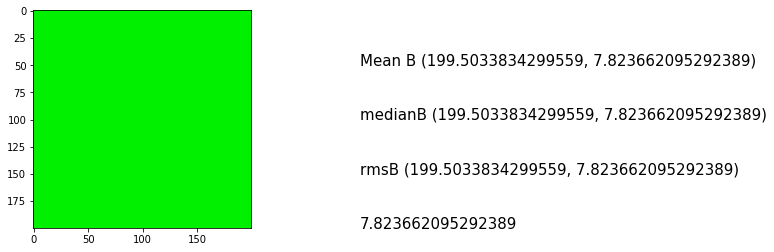

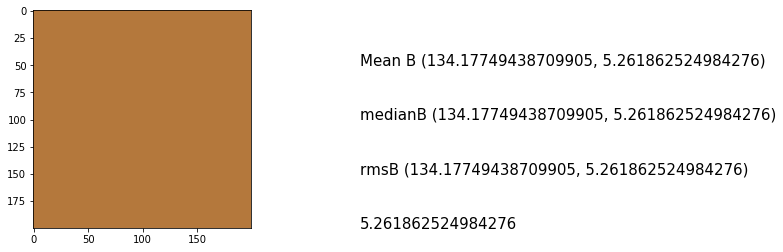

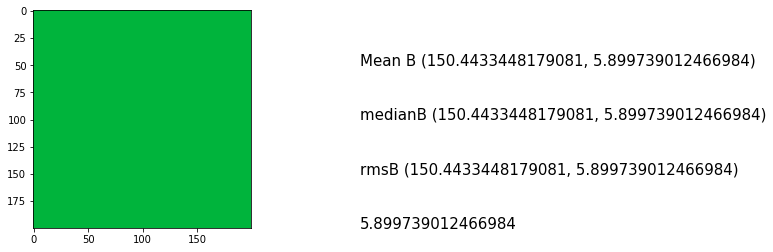

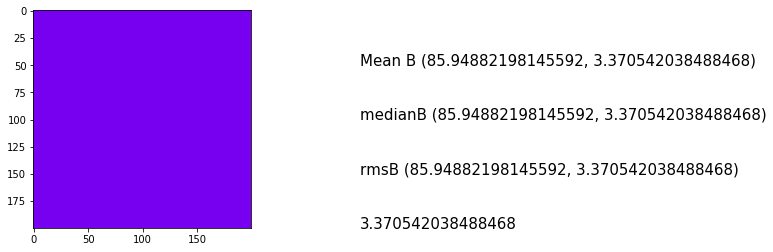

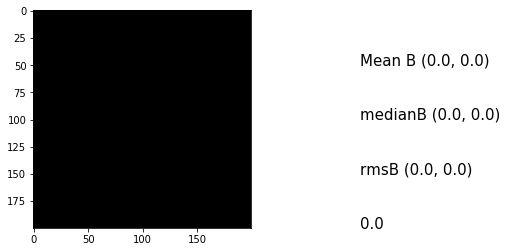

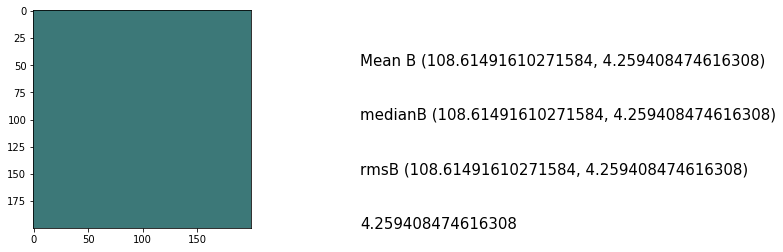

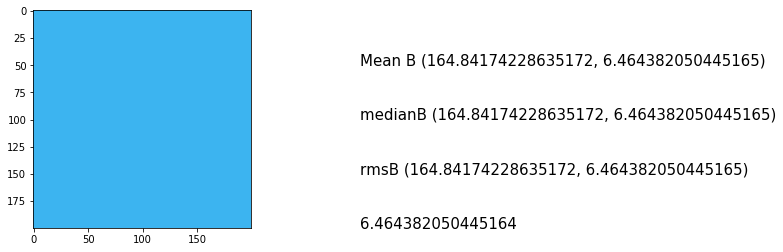

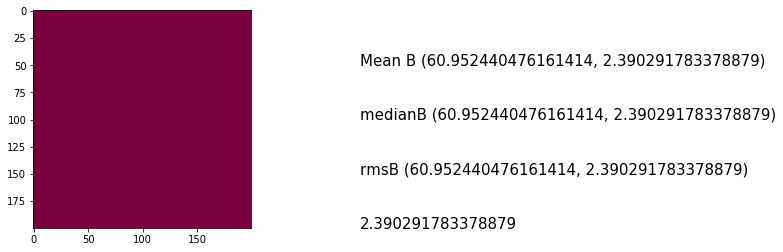

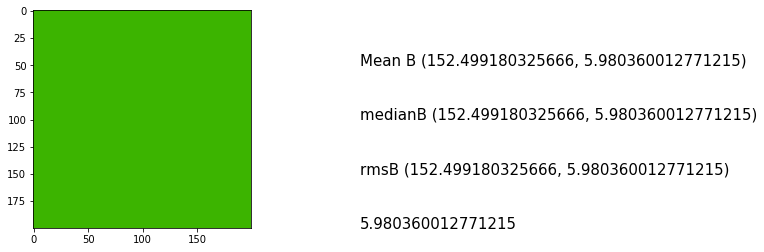

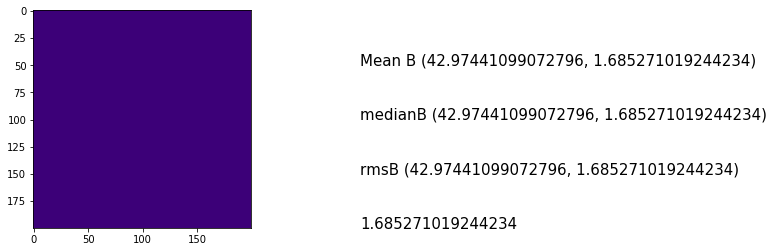

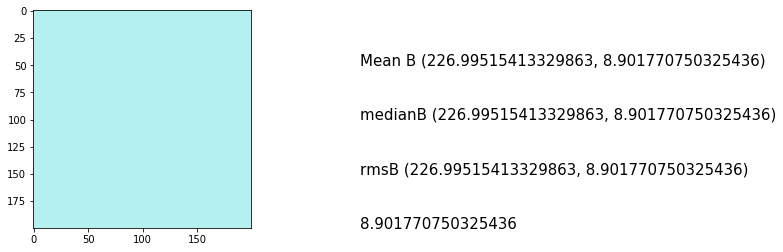

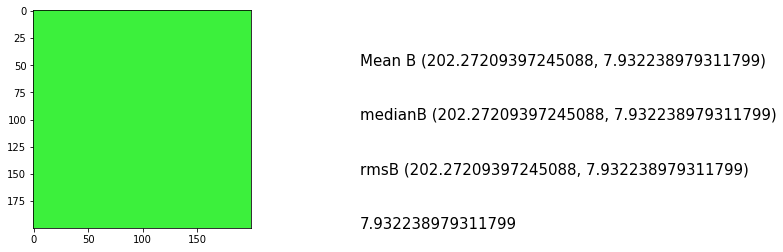

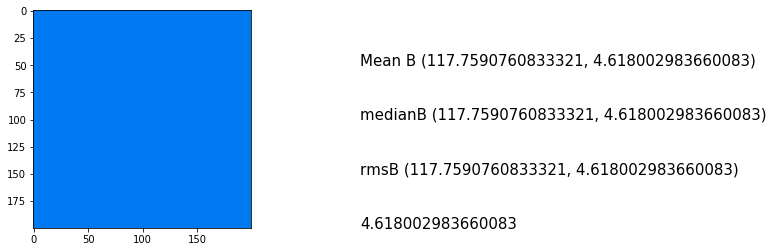

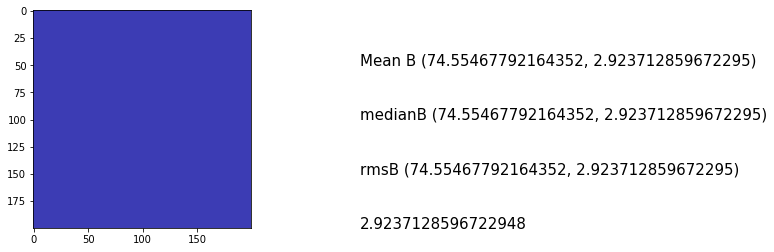

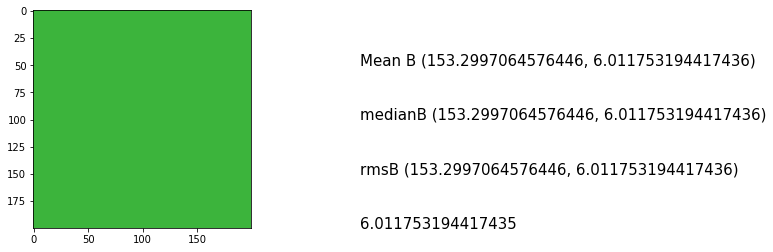

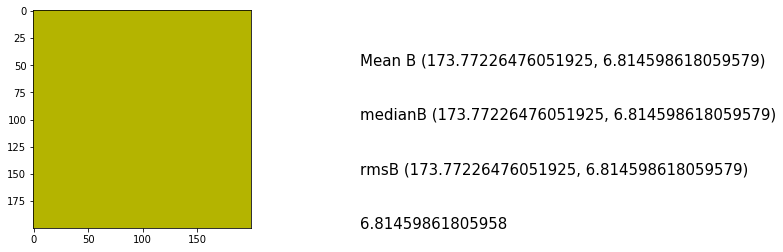

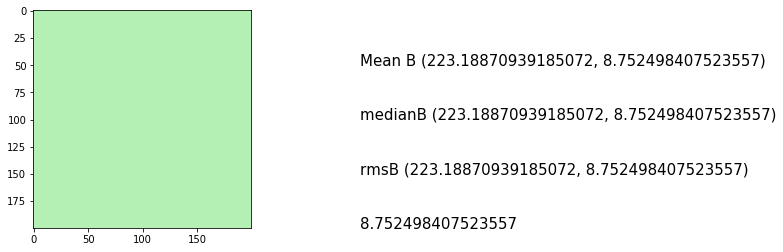

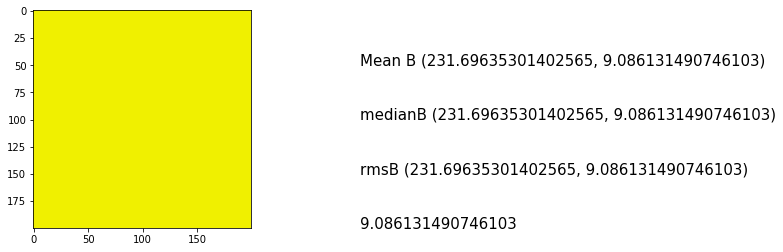

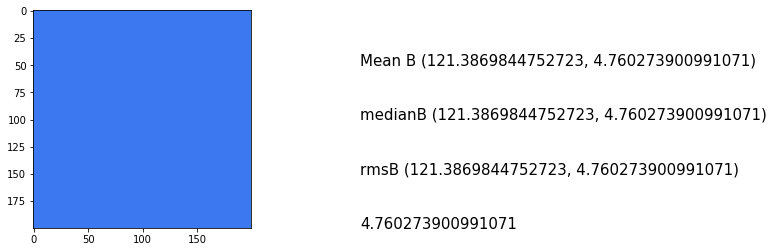

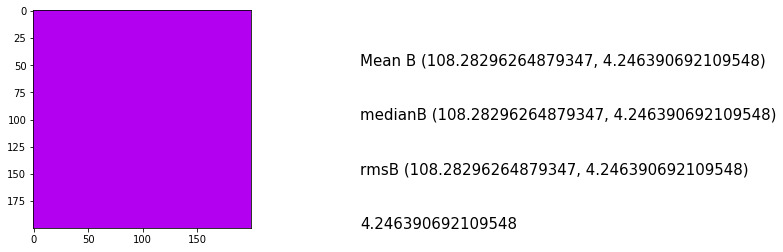

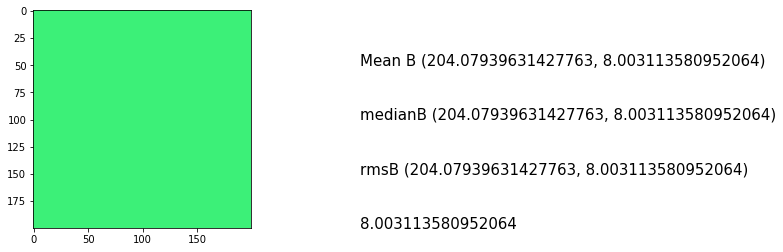

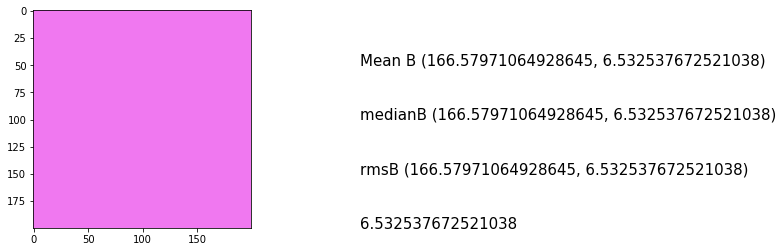

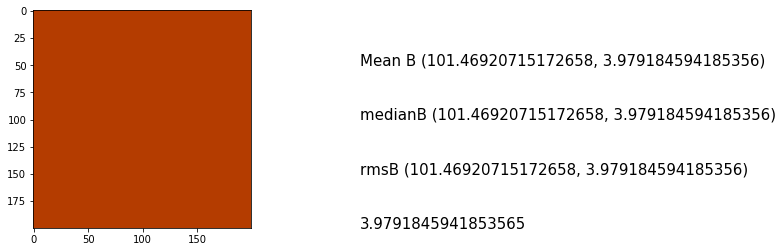

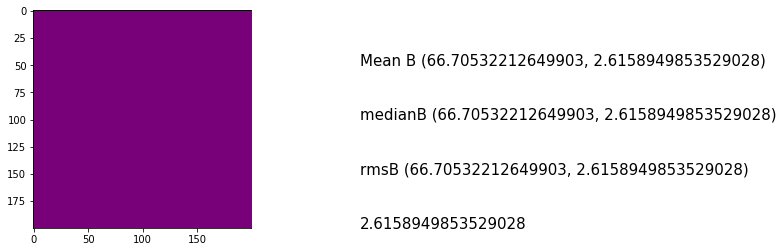

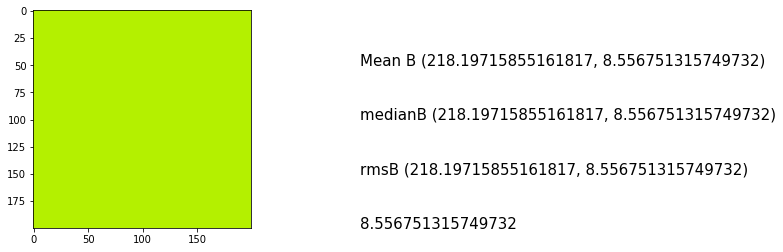

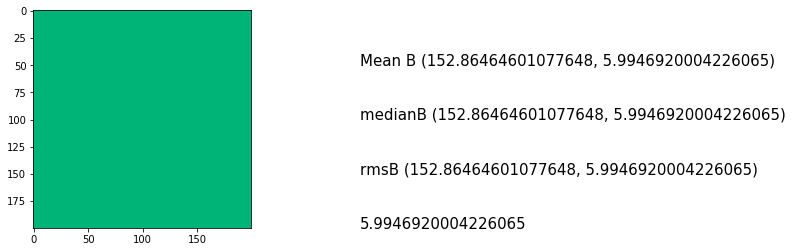

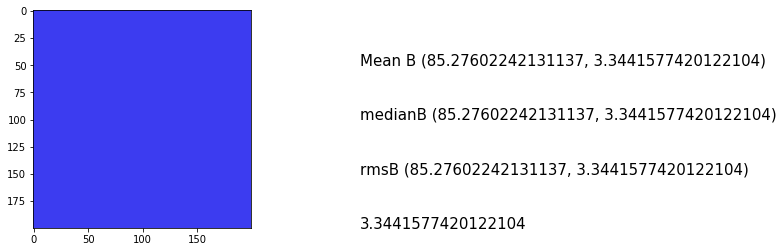

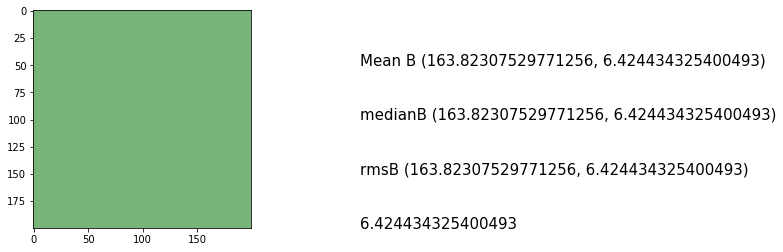

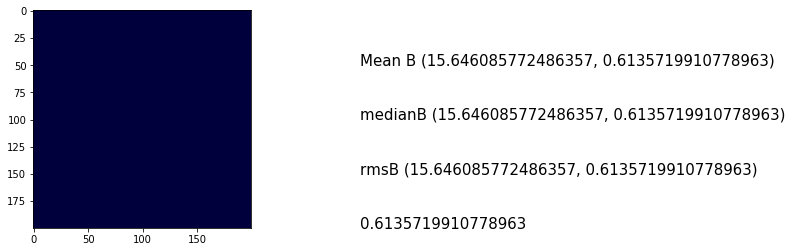

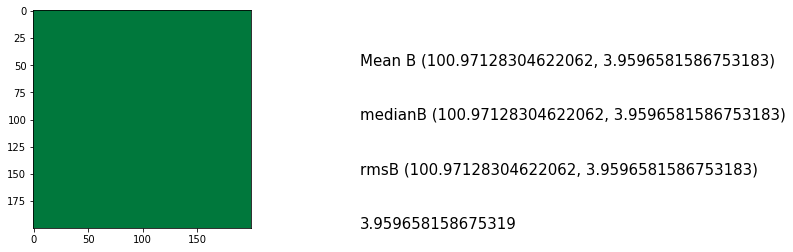

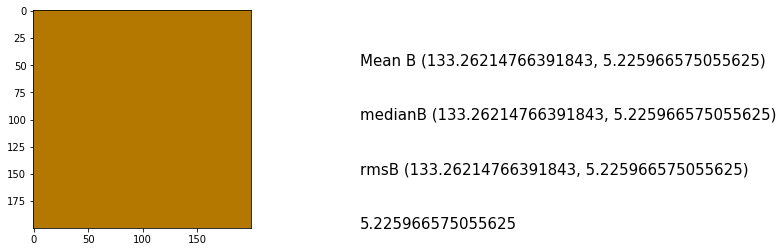

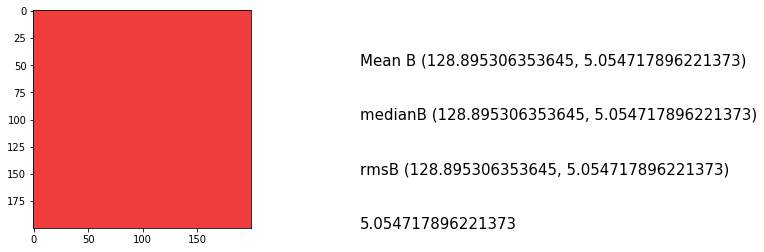

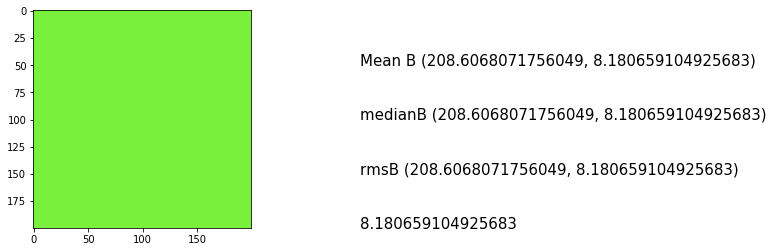

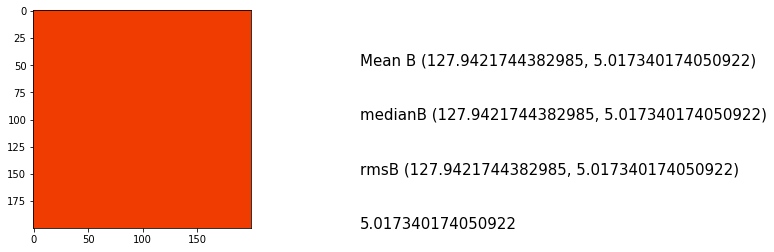

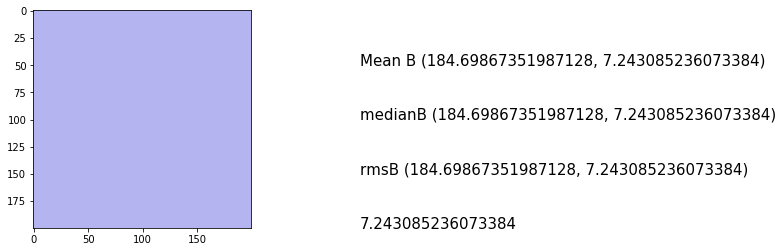

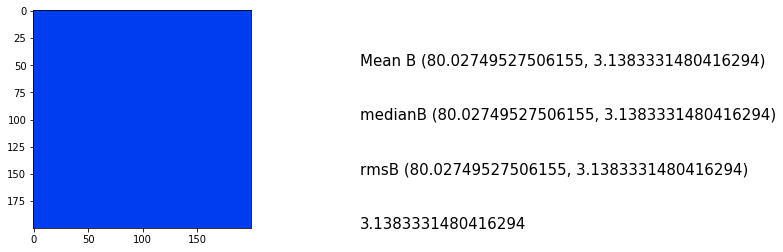

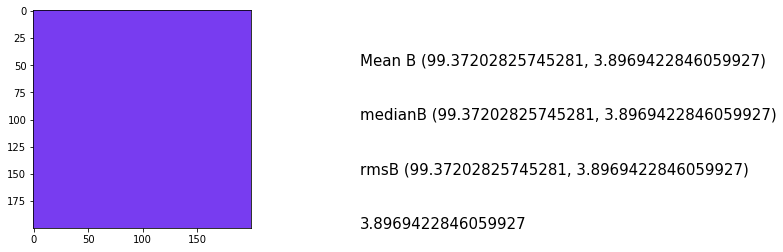

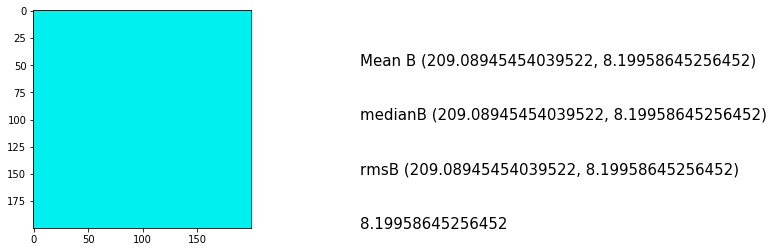

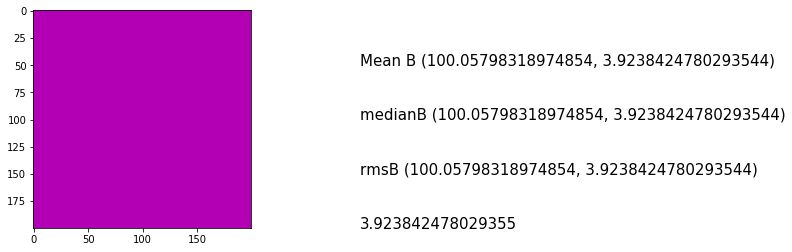

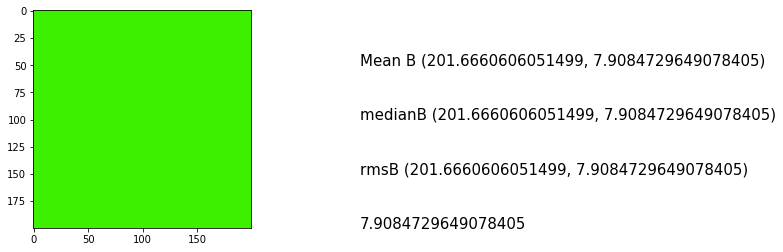

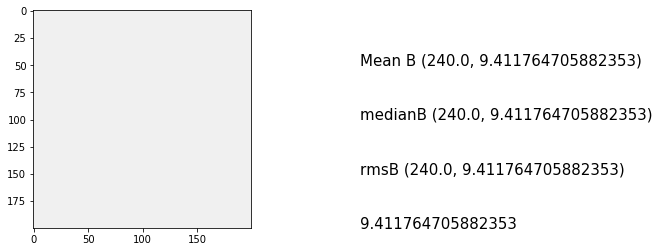

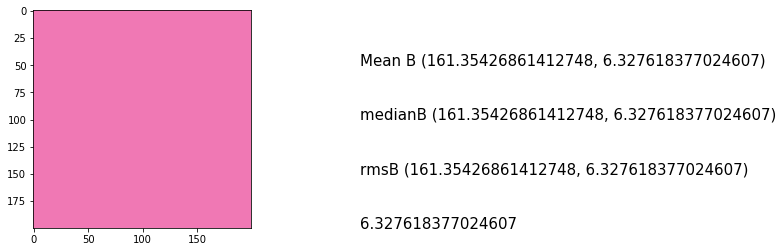

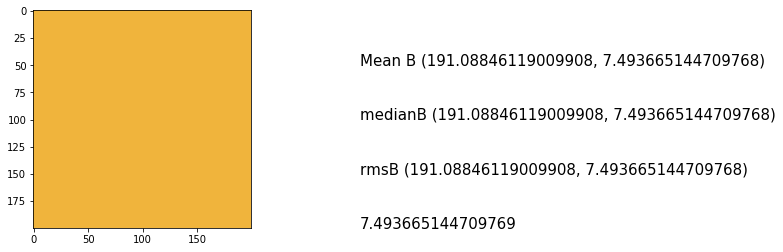

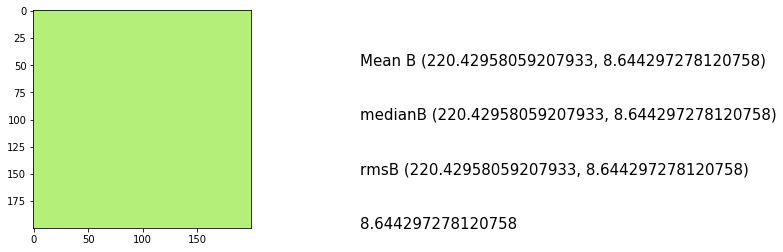

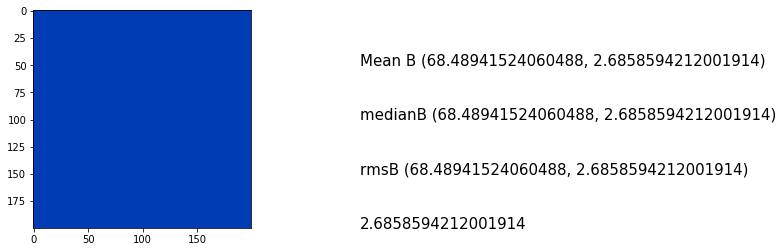

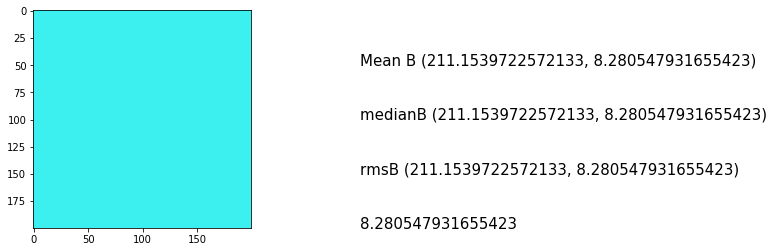

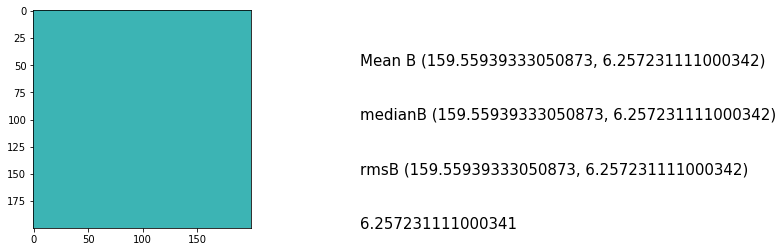

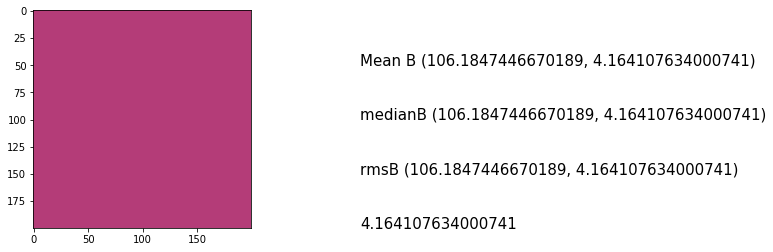

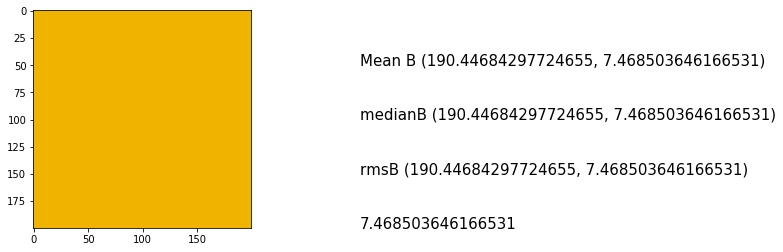

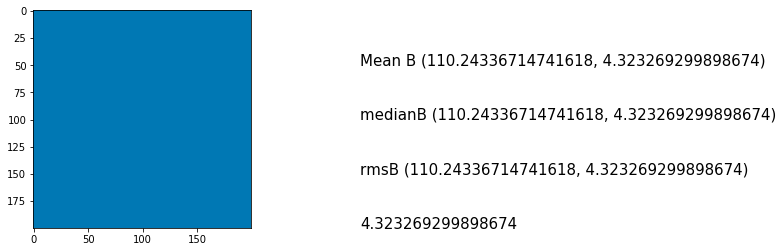

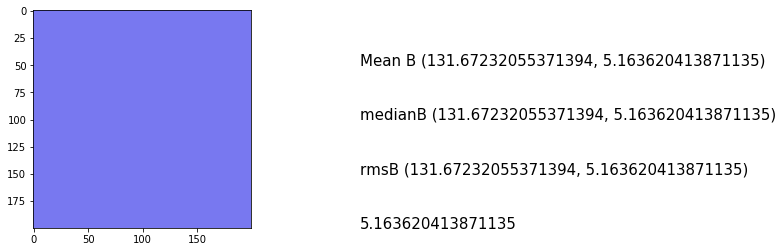

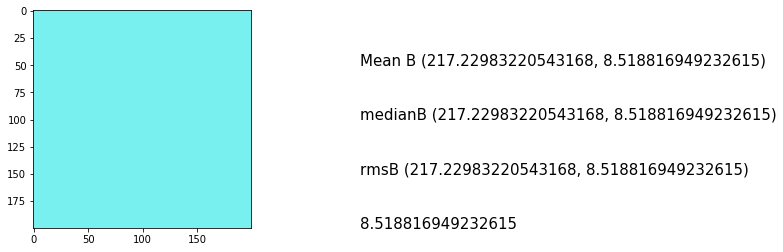

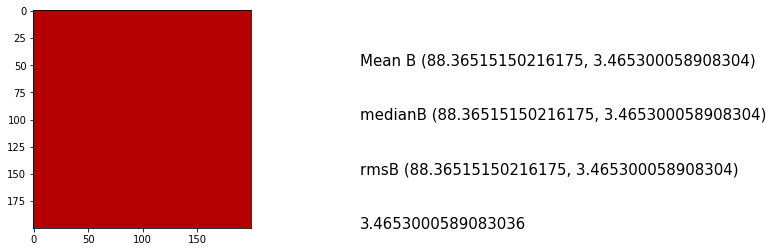

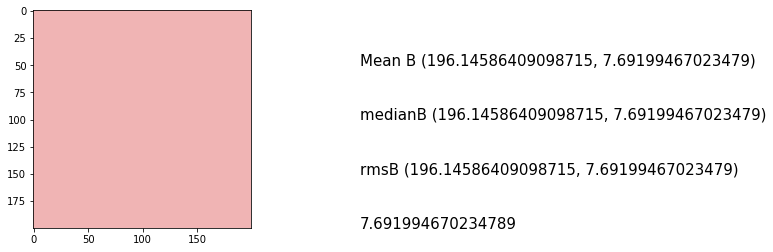

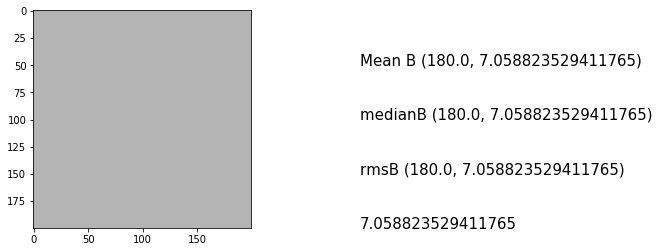

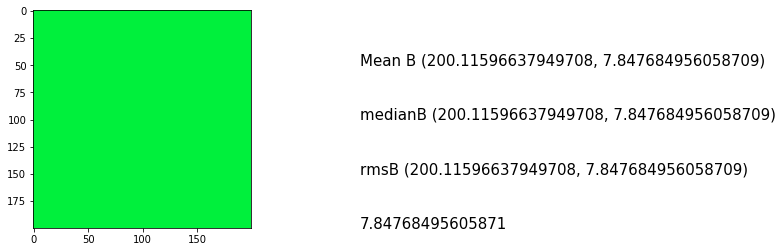

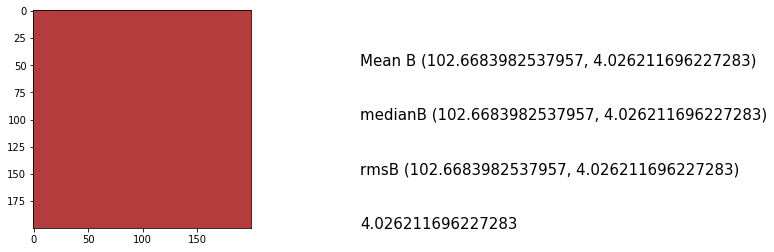

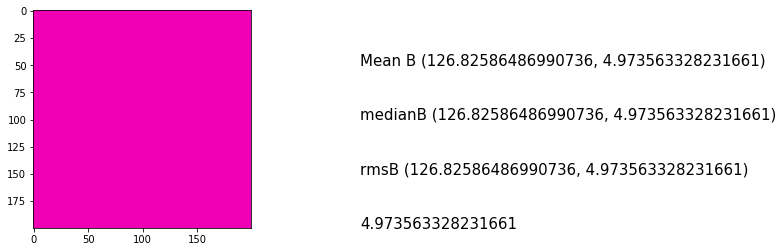

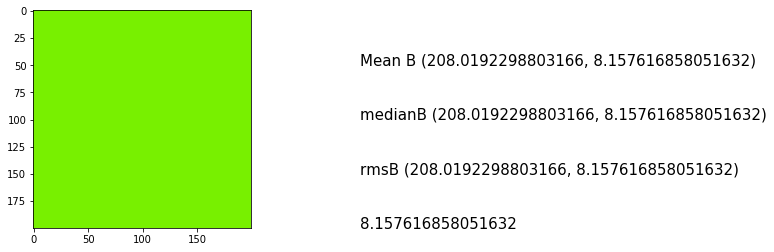

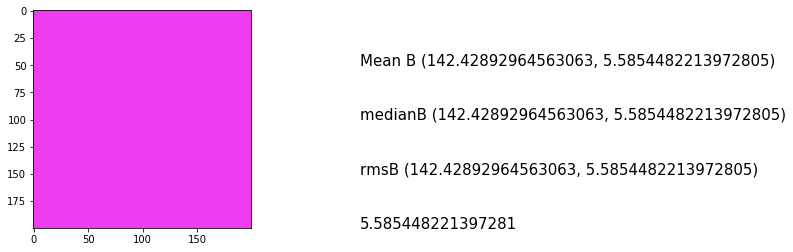

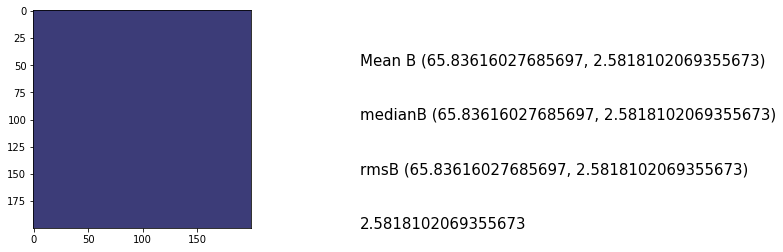

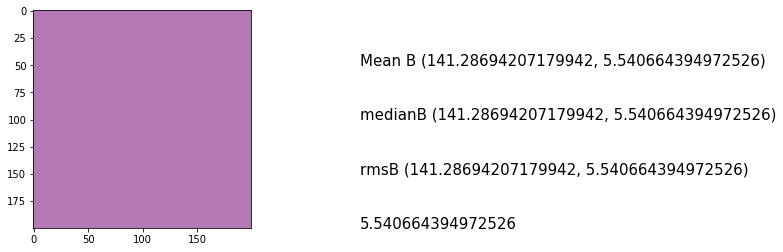

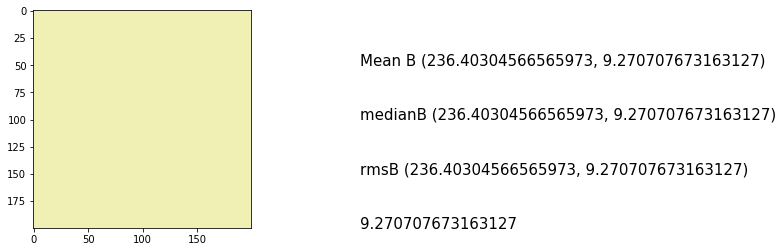

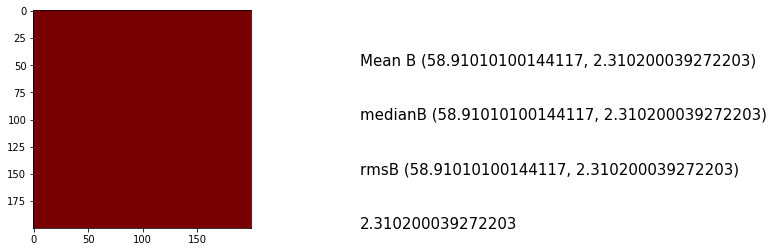

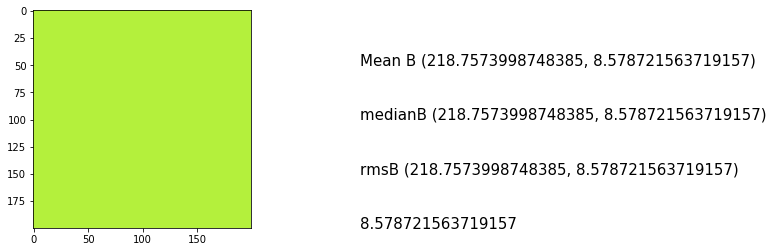

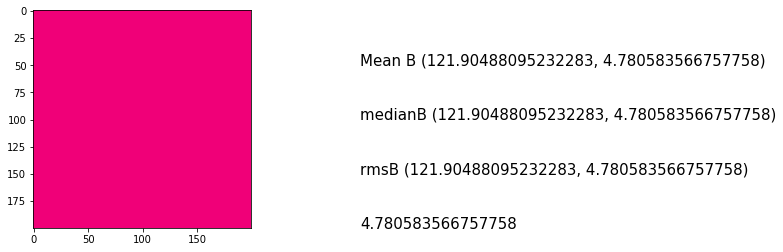

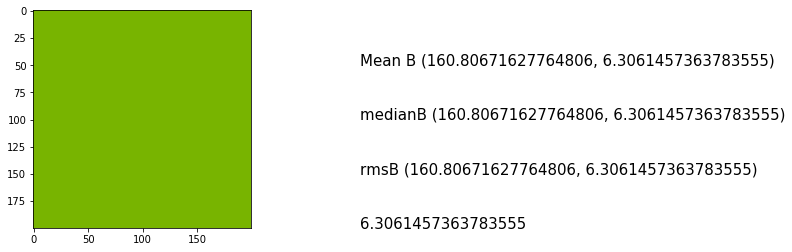

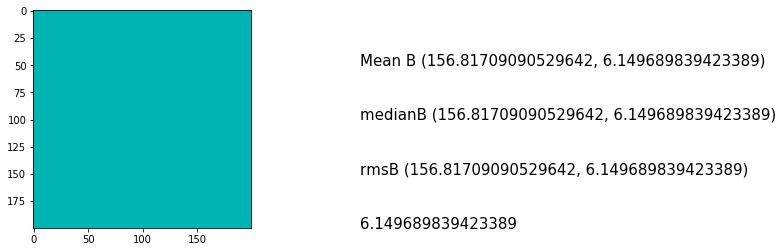

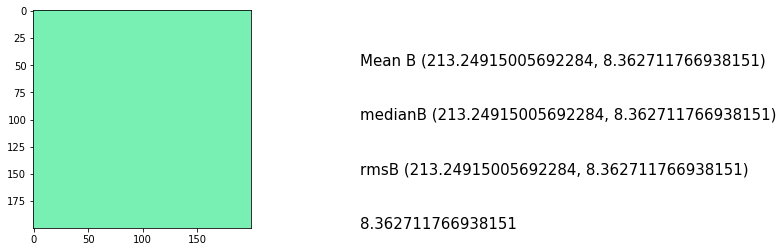

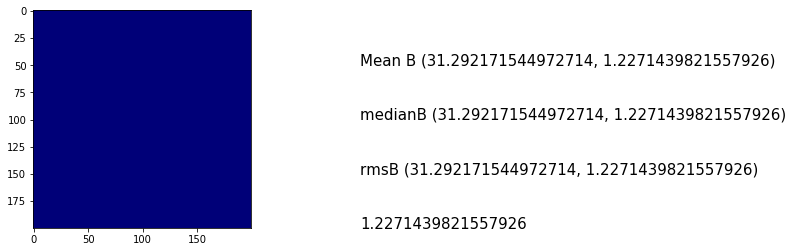

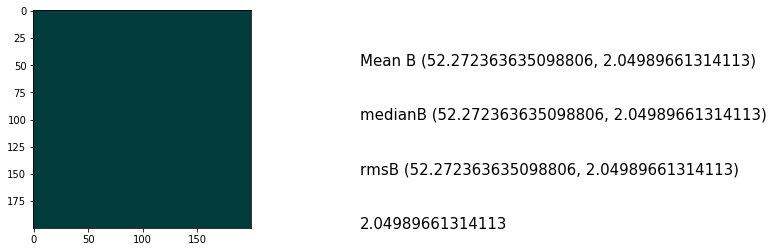

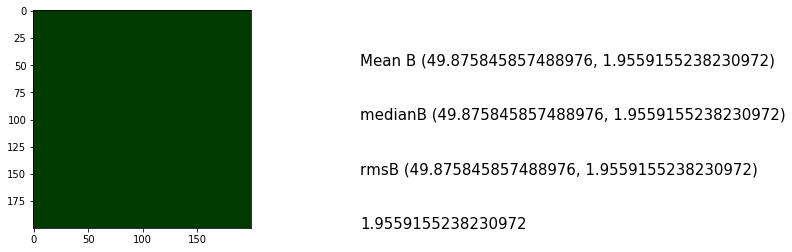

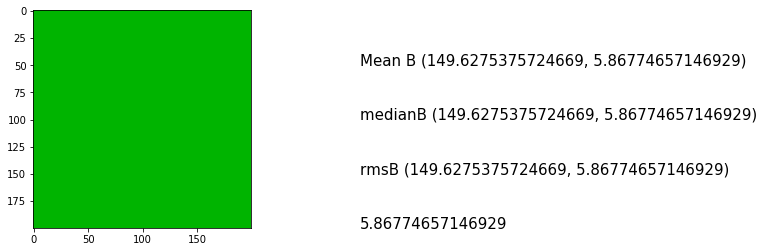

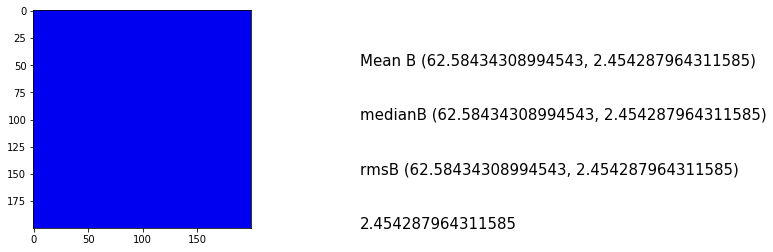

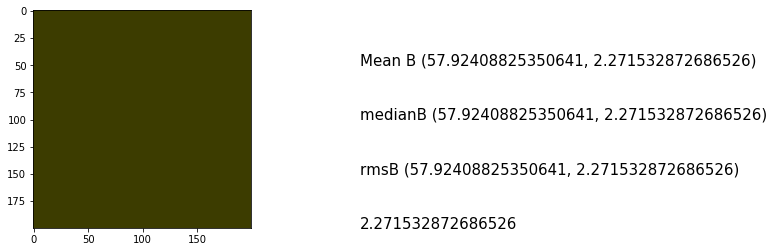

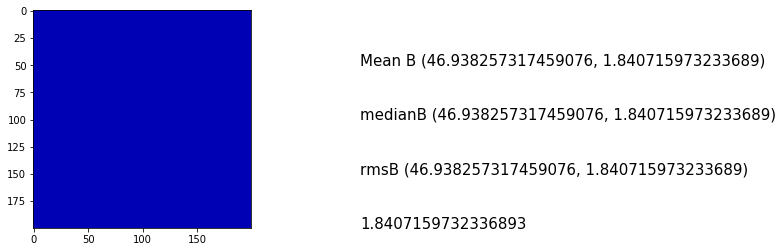

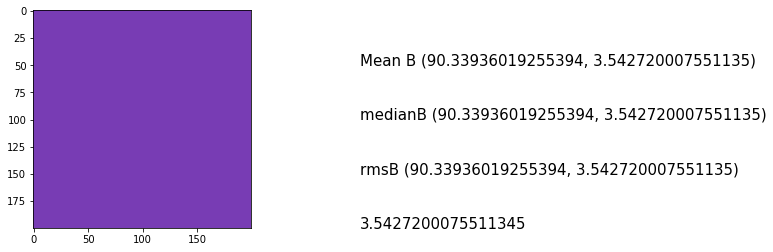

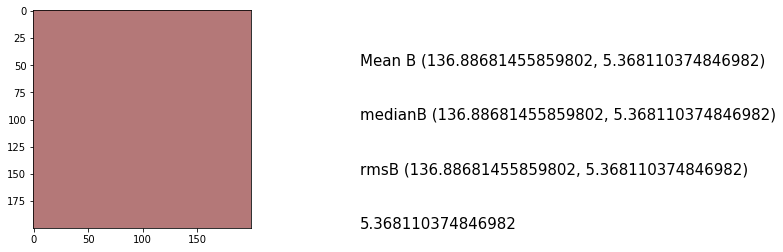

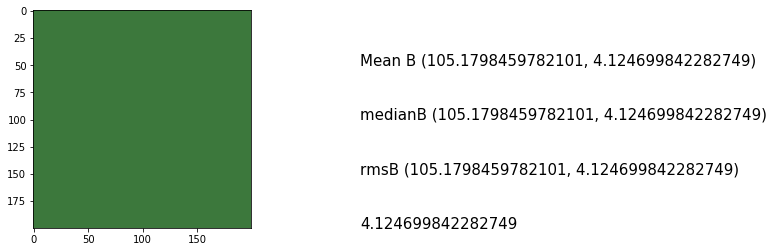

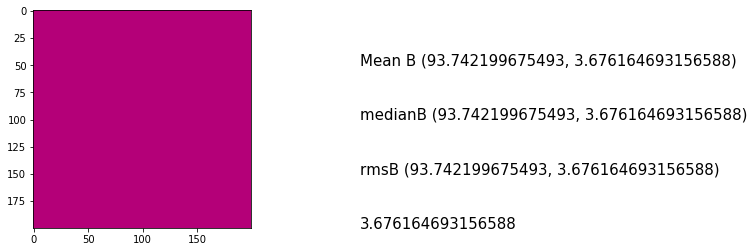

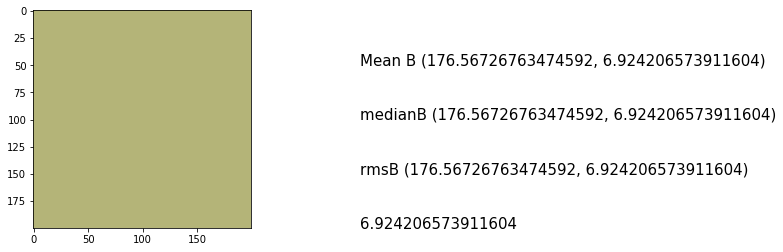

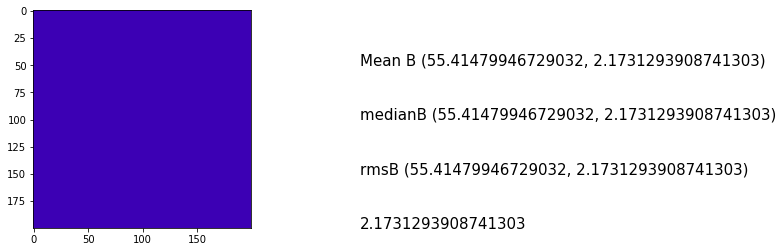

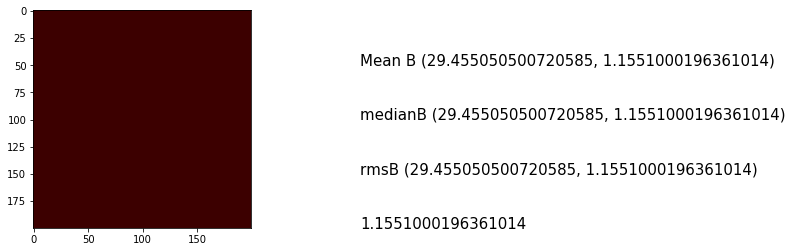

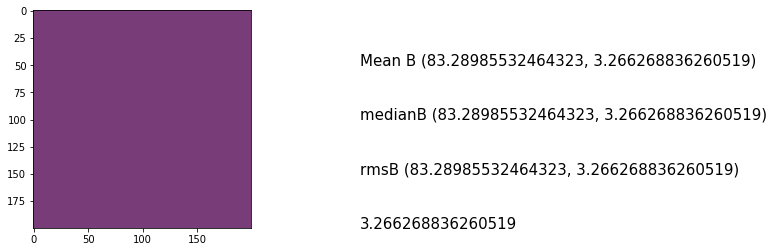

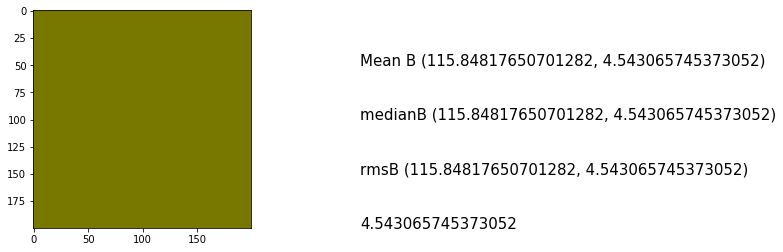

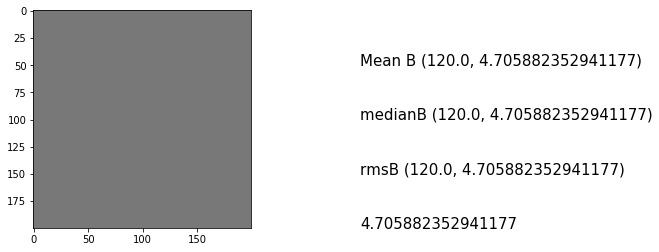

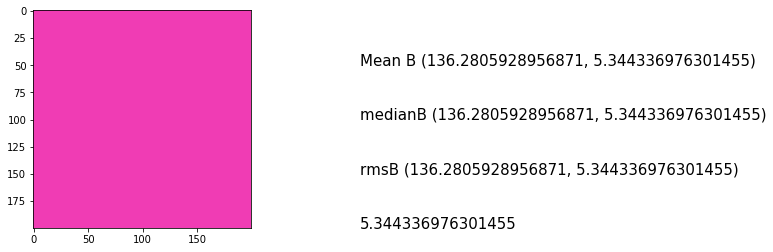

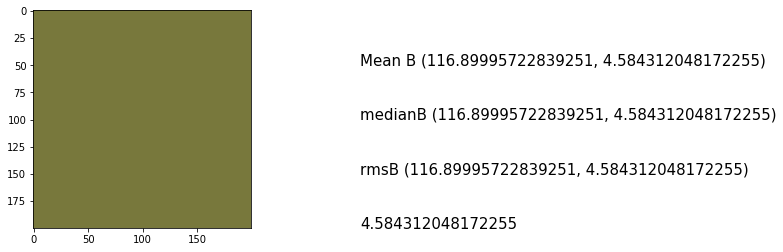

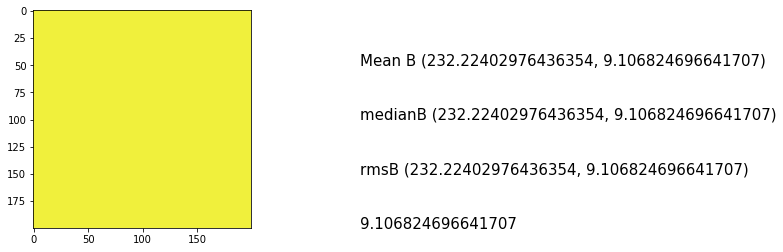

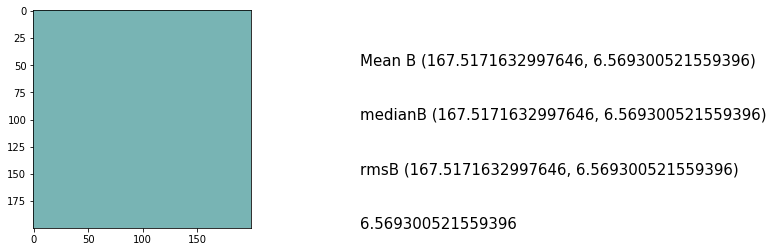

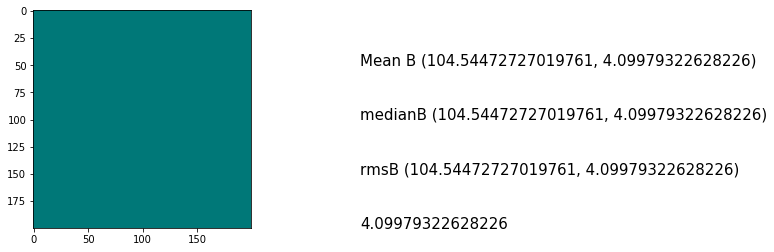

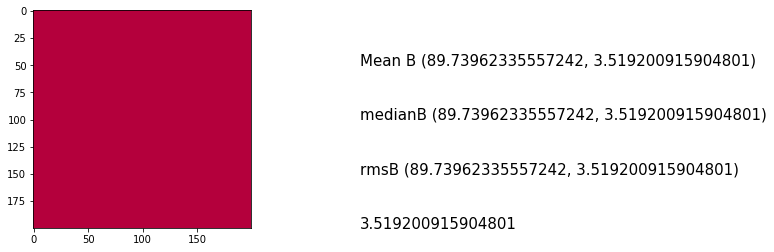

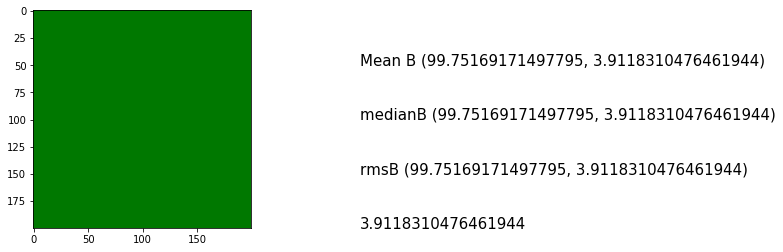

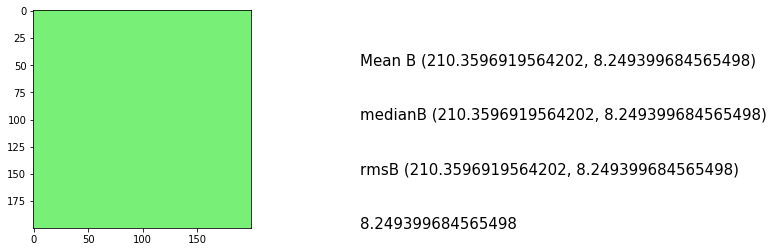

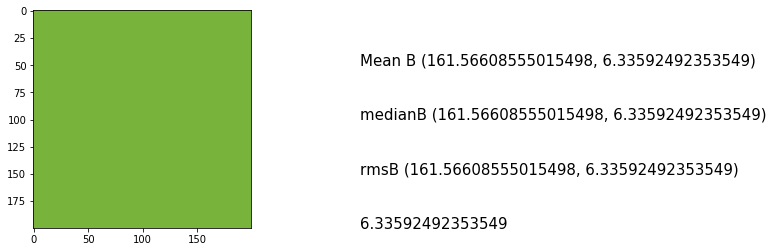

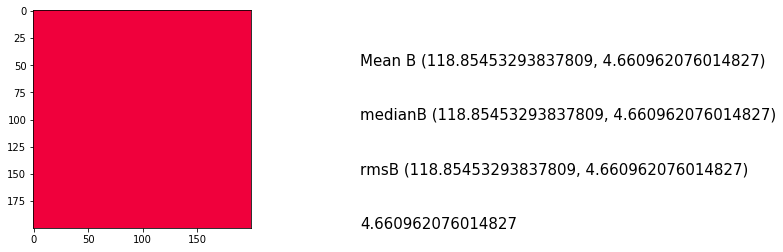

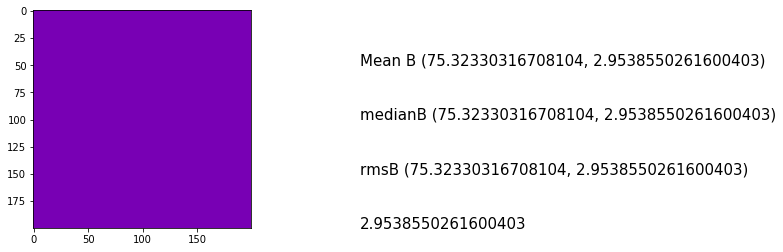

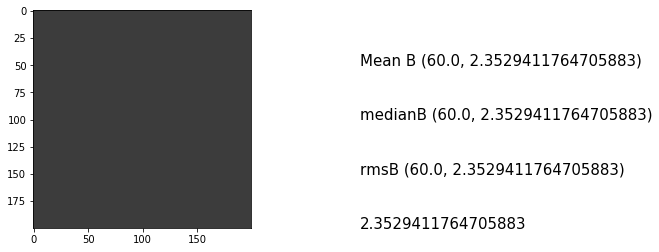

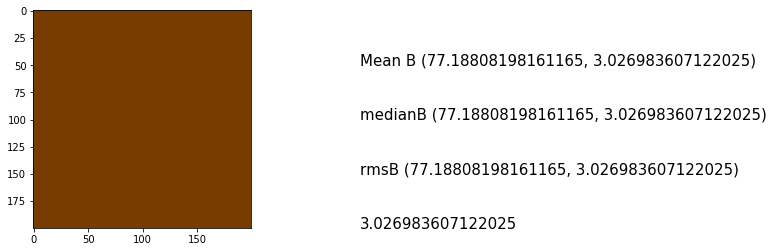

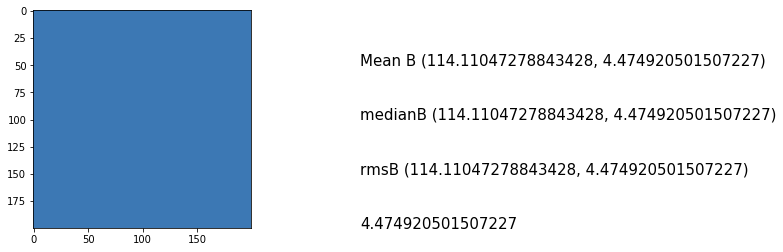

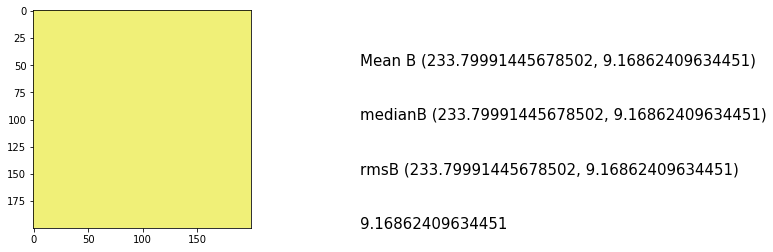

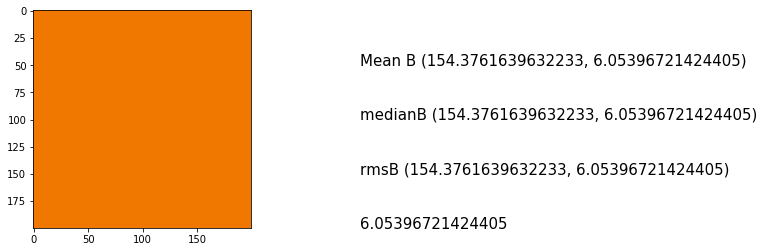

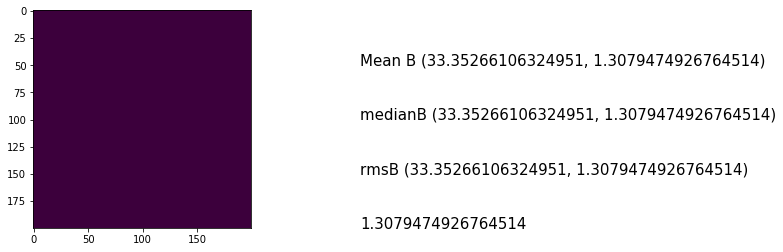

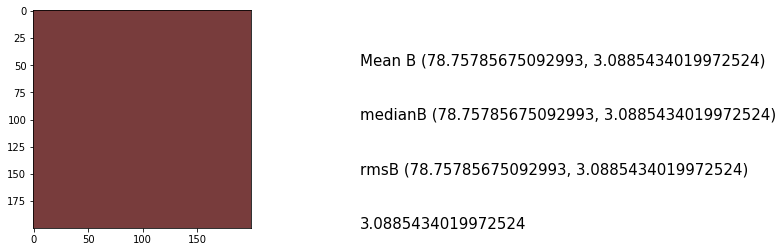

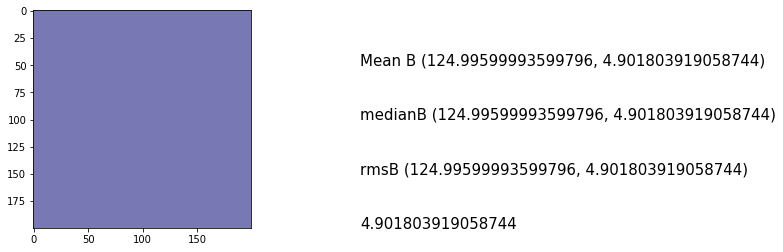

In [48]:
import os

Li = os.listdir("../ImageNet/")

for im in Li:
    filePath = "../ImageNet/"+im
    plotData(filePath)

### Predict on Practice image
    -choose any image from input directory

In [ ]:
filePath = "../input/"
img = Image.open(filePath)

fig = plt.figure()
a = fig.add_subplot()
imgplot = plt.imshow(img)

meanB = "Mean B " + str(getMeanBrightenss(filePath))
medianB = "medianB " + str(getMedianBrightness(filePath))
rmsB = "rmsB " + str(getRMSBrightness(filePath))

finalB = ( getMeanBrightenss(filePath)[1] + getMedianBrightness(filePath)[1] + getRMSBrightness(filePath)[1] )/3

a.text(300,50, meanB, fontsize=15)
a.text(300,100, medianB, fontsize=15)
a.text(300,150, rmsB, fontsize=15)
a.text(300,200, finalB, fontsize=15)

plt.show()